### 本篇实战案例说明

#### 关于 NBA 数据集

其实本来是想找一些科比的数据集，来用数据分析的方式来看看科比的职业生涯。但是由于一些数据集缺陷和能力问题，没有找到想要的数据集。

不过倒是发现一个数据集 API，后续分析 NBA 数据也许可以用得上。需要的可以了解：
https://sportsreference.readthedocs.io/en/stable/#

最后在网上找到有乔丹常规赛数据集，于是就拿来练练手。争取过段时间可以拿科比数据，以及 NBA 联盟数据，来做一些常规对比和高阶数据对比，以及一些模型预测。

本案例乔丹常规赛的数据分析，也有参看其他同学的的分析维度。





### 案例
#### 导入数据

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from PIL import Image
%matplotlib inline

pd.set_option("display.max_column",None)
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})


#用来正常显示中文标签
plt.rcParams['font.family'] = ['Arial Unicode MS'] 

#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False 

In [13]:
df_season = pd.read_pickle("/season.pkl")
df_season.rename(columns={"出手":"总出手","命中":"总命中","命中.1":"三分命中","出手.1":"三分出手","命中.2":"罚球命中","出手.2":"罚球出手"},
                inplace=True)
df_season.head()

,球员,赛季,果,比赛,首发,时间,投篮,总命中,总出手,三分,三分命中,三分出手,罚球,罚球命中,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛
3,迈克尔-乔丹,86-87,胜,活塞120-125公牛,1,43,56.4%,22,39,NaN,0,0,94.4%,17,18,7,3,4,3,3,3,5,0,61,常规赛
4,迈克尔-乔丹,86-87,负,老鹰117-114公牛,1,41,57.9%,22,38,0.0%,0,3,81.0%,17,21,10,5,5,1,4,1,3,3,61,常规赛
5,迈克尔-乔丹,87-88,胜,活塞110-112公牛,1,42,77.8%,21,27,0.0%,0,1,89.5%,17,19,4,2,2,6,2,2,1,4,59,常规赛


#### 总得分、场均得分；总助攻、场均助攻；总篮板、场均篮板

In [41]:
# 计算常规赛总得分和场均得分
df_score = df_season['得分'].sum()
average_score = df_score // df_season.shape[0]


# 计算常规赛总助攻和场均助攻
df_assist = df_season['助攻'].sum()
average_assist = df_assist // df_season.shape[0]


# 计算常规赛总篮板、场均篮板
df_board = df_season['篮板'].sum()
average_board = df_board // df_season.shape[0]


# 输出
print('常规赛总得分: %d \t 场均得分: %d'%(df_score,average_score) ,'\n','-'*30)
print('常规赛总助攻: %d \t 场均助攻: %d'%(df_assist,average_assist) ,'\n','-'*30)
print('常规赛总助攻: %d \t 场均助攻: %d'%(df_board,average_board))

总得分: 29979 	 场均得分: 30 
 ------------------------------
总助攻: 5152 	 场均助攻: 5 
 ------------------------------
总助攻: 6138 	 场均助攻: 6


#### 每个常规赛季总得分和胜率可视化

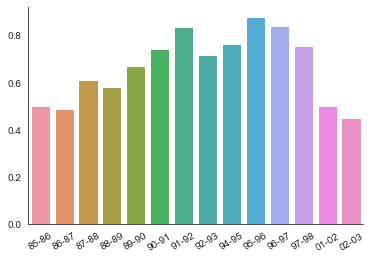

In [55]:
### 赛季顺序调整
season = list(np.sort(df_season["赛季"].unique()))
season = season[2:] + season[:2]

# 准备赛季胜率数据
df_season["win"] = df_season["果"].map({"胜": 1, "负": 0})
df_season_group =  df_season.groupby(["赛季"])["win"].mean()

# 常规赛胜率情况可视化
df_season_group = df_season_group[season].values
sns.barplot(x=season,y=df_season_group)
plt.xticks(rotation=30)
sns.despine()

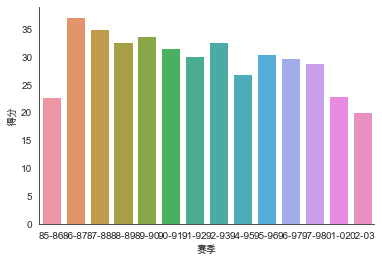

In [56]:
# 常规赛得分情况可视化
sns.barplot(x="赛季",y="得分",data=df_season,order=season,ci=None)
sns.despine()

#### 单场得分情况占比

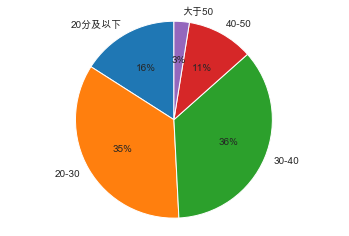

In [49]:
interval = ["20分及以下","20-30","30-40","40-50","大于50"]
value = pd.cut(df_season["得分"],bins=[0,20,30,40,50,100],labels=interval).value_counts(normalize=True)
value_pro = value[interval].values

fig1, ax1 = plt.subplots()
ax1.pie(value_pro,
        labels=interval, 
        autopct='%1.0f%%',
         startangle=90)
ax1.axis('equal')  

#plt.savefig('Demo_official.jpg')
plt.show()

#### 2分、3分、罚球情况占比

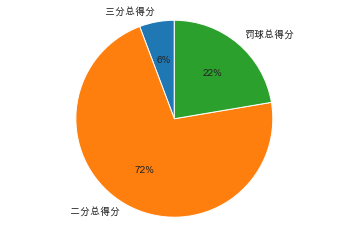

In [57]:
three_point_select = df_season['三分命中'].sum()*3 / df_season['得分'].sum()
free_hrow_select = df_season['罚球命中'].sum() / df_season['得分'].sum()
two_point_select = 1 - three_point_select-free_hrow_select
point = [three_point_select,two_point_select,free_hrow_select]


interval = ['三分总得分','二分总得分','罚球总得分']
fig1, ax1 = plt.subplots()
ax1.pie(point,
        labels=interval, 
        autopct='%1.0f%%',
         startangle=90)
ax1.axis('equal')  
plt.show()

#### 2分、3分出手占比

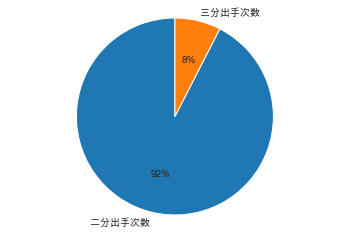

In [51]:
three_point_shoot = df_season["三分出手"].sum() / df_season["总出手"].sum()
two_point_shoot = 1 - three_point_shoot


shoot = [two_point_shoot,three_point_shoot]
interval2 = ['二分出手次数','三分出手次数']
fig1, ax1 = plt.subplots()
ax1.pie(shoot,
        labels=interval2, 
        autopct='%1.0f%%',
         startangle=90)
ax1.axis('equal')  

plt.show()

#### 对阵联盟各个球队得分情况可视化

In [66]:
# 数据处理
pattern = re.compile(r'[\u4E00-\u9FA5]+')
df_season["team_list"] = df_season["比赛"].str.findall(pattern).map(set)


def get_opp(x,num=0):
    period_dict = {0:"公牛",1:"奇才"}
    opp = (x-set([period_dict[num]])).pop()
    if opp == "人":
        return "76人"
    elif opp == "凯尔特":
        return "凯尔特人"
    elif opp == "超音速":
        return "雷霆"
    elif opp == "子弹":
        return "奇才"
    else:
        return opp
df_season.loc[~df_season["赛季"].isin(["01-02","02-03"]),"opp"] = df_season["team_list"].map(lambda x : get_opp(x,0))
df_season.loc[df_season["赛季"].isin(["01-02","02-03"]),"opp"] = df_season["team_list"].map(lambda x : get_opp(x,1))

Text(0, 0.5, '对阵球队')

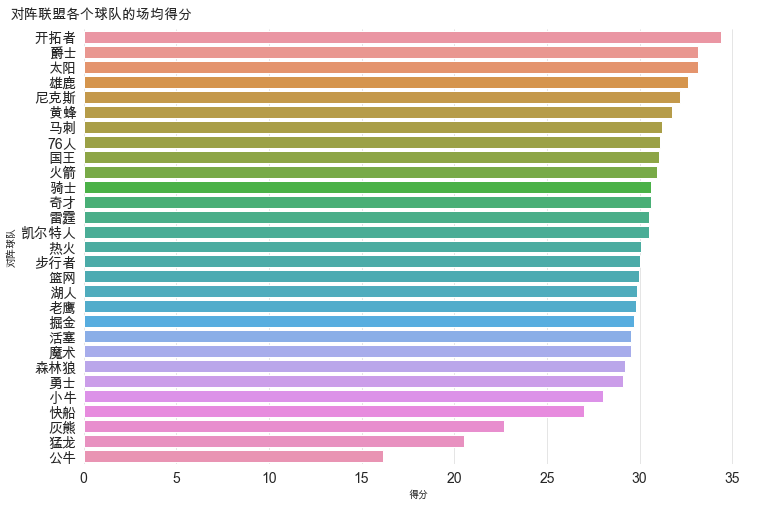

In [82]:
# 可视化
fig, ax = plt.subplots(figsize=(12,8))
order = df_season.groupby("opp")["得分"].mean().sort_values(ascending=False).index

sns.barplot(y="opp",x = "得分",order=order,data=df_season,ci=None)
plt.box(False)

fig.text(x=0.04, 
         y=0.90, 
         s='对阵联盟各个球队的场均得分', 
         fontsize=14
        )

plt.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.grid(which='both', linewidth=0.5)
plt.ylabel('对阵球队')

#### 对阵联盟各个求对胜率情况

Text(0, 0.5, '')

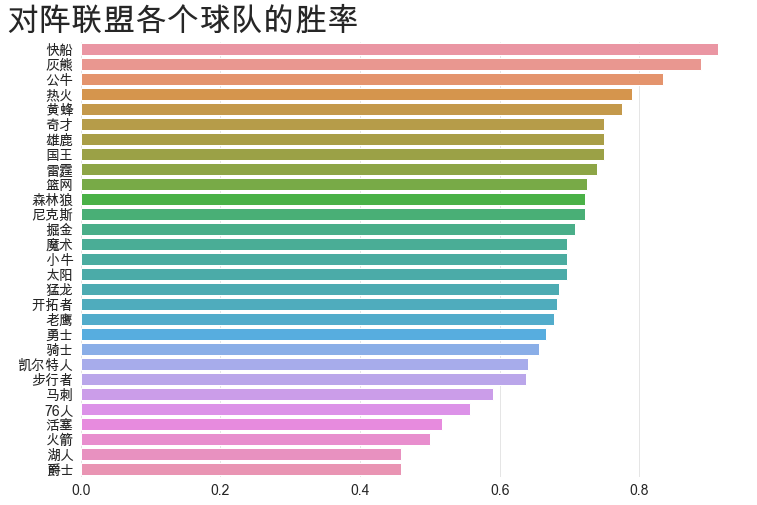

In [83]:
# 可视化
fig, ax = plt.subplots(figsize=(12,8))
order = df_season.groupby("opp")["win"].mean().sort_values(ascending=False).index

sns.barplot(y="opp",x = "win",order=order,data=df_season,ci=None)
plt.box(False)
fig.text(x=0.04, y=0.90, s='对阵联盟各个球队的胜率', 
         fontsize=32,
         weight='bold')

plt.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.grid(which='both', linewidth=0.5)
plt.xlabel('')
plt.ylabel('')

本篇案例只是对乔丹常规赛数据做了简单分析，如果要论证乔丹在 NBA 是否是“GOAT”，可以看看张公子的这篇文章。

- https://mp.weixin.qq.com/s/rY4GjIphQIDt6XG6e9k5kQ